## Importing Necessary Files

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#library file for train test split 
from sklearn.model_selection import train_test_split

#library files for model building 
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Importing the Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### What dataset says about ?

### Basic Information of the Dataset


#### Shape of the Dataset

In [3]:
print ('The Number of Rows present in the Dataset is \t\t',df.shape[0])
print ('The Number of Columns present in the Dataset is \t',df.shape[1])

The Number of Rows present in the Dataset is 		 284807
The Number of Columns present in the Dataset is 	 31


#### Checking the Datatypes of the Dataset

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### Checking for the Missing Values 

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Handling

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
print('The Total Transaction in the Dataset is \t:',len(df['Class']))
print('\nThe Genuine Transaction in the Dataset is \t:',df['Class'].value_counts()[0])
print('\nThe Genuine Transaction in the Dataset is \t:',df['Class'].value_counts()[1])

The Total Transaction in the Dataset is 	: 284807

The Genuine Transaction in the Dataset is 	: 284315

The Genuine Transaction in the Dataset is 	: 492


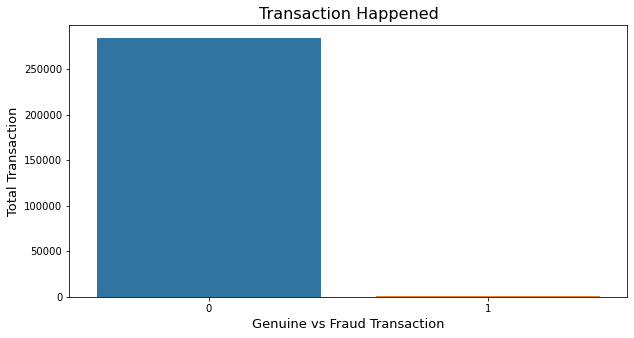

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df['Class'])
plt.title('Transaction Happened',size = 16)
plt.xlabel('Genuine vs Fraud Transaction', size = 13)
plt.ylabel('Total Transaction', size = 13)
plt.show()

#### Transaction Amount from the Dataset

In [9]:
df.Amount.value_counts()

1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
438.10        1
152.29        1
156.45        1
724.44        1
102.77        1
Name: Amount, Length: 32767, dtype: int64

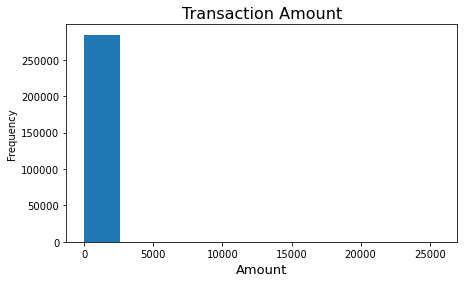

In [10]:
plt.figure(figsize=(7,4))
df['Amount'].plot(kind= 'hist')
plt.title('Transaction Amount', size =16)
plt.xlabel('Amount', size = 13)
plt.show()

In [11]:
print('The Minimum amount of Transaction happened is\t:', df.Amount.min())
print('The Minimum amount of Transaction happened is\t:', df.Amount.max())

The Minimum amount of Transaction happened is	: 0.0
The Minimum amount of Transaction happened is	: 25691.16


In [12]:
df.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
81790.0      1
54289.0      1
37651.0      1
112892.0     1
119665.0     1
Name: Time, Length: 124592, dtype: int64

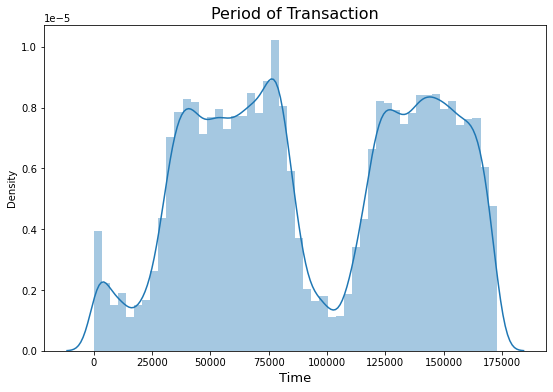

In [13]:
plt.figure(figsize=(9,6))
sns.distplot(df['Time'])
plt.title('Period of Transaction', size=16)
plt.xlabel('Time',size = 13)
plt.show()

#### Dropping the Time Column

In [14]:
df.drop(['Time'],axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Dropping the Duplicates

In [15]:
print('The rows and columns in the dataset before Dropping the Duplicates', df.shape)

df.drop_duplicates(inplace= True)

print('The rows and columns in the dataset after Dropping the Duplicates',df.shape)

The rows and columns in the dataset before Dropping the Duplicates (284807, 30)
The rows and columns in the dataset after Dropping the Duplicates (275663, 30)


## Model Building 

### Scaling the Dataset

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.233169,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.347092,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.137702,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.130015,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.081308,0


#### Train - Test Split of the Dataset

In [18]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (206747, 29)
The shape of X_test is: (68916, 29)
The shape of y_train is: (206747,)
The shape of y_test is: (68916,)


### Logistic Regression Model 

In [20]:
lg=LogisticRegression().fit(X_train, y_train)
lg_pred=lg.predict(X_test)

#### Checking the Accuracy of the Logistic Regression Model 

In [21]:
lr_acc = accuracy_score(y_test, lg_pred)
print('The Accuracy obtained from the Logistic Regression Model is',lr_acc)


The Accuracy obtained from the Logistic Regression Model is 0.9989552498694062


In [22]:
list_accuracy = []
list_accuracy.append(lr_acc)

### SVC Model

In [23]:
svm=SVC().fit(X_train, y_train)
svm_pred=svm.predict(X_test)

#### Checking the Accuracy of the SVC Model 

In [24]:
svc_acc = accuracy_score(y_test, svm_pred)
print('The Accuracy obtained from the SVC Model is',svc_acc)

The Accuracy obtained from the SVC Model is 0.999318010331418


In [25]:
list_accuracy.append(svc_acc)

### Decision Tree Classifier

In [26]:
dtc=DecisionTreeClassifier().fit(X_train, y_train)
dtc_pred=dtc.predict(X_test)

#### Checking the Accuracy of the DTC Model

In [27]:
dtc_acc = accuracy_score(y_test, dtc_pred)
print('The Accuracy obtained from the Decision Tree Classifier Model is',dtc_acc)

The Accuracy obtained from the Decision Tree Classifier Model is 0.9990132915433281


In [28]:
list_accuracy.append(dtc_acc)

### Random Forest Classifier Model 

In [29]:
rfc=RandomForestClassifier().fit(X_train, y_train) 
rfc_pred= rfc.predict(X_test)

#### Checking the Accuracy of the Random Forest Classifier Model 

In [30]:
rfc_acc = accuracy_score(y_test, rfc_pred)
print('The Accuracy obtained from the Random Forest Classifier Model is',rfc_acc)

The Accuracy obtained from the Random Forest Classifier Model is 0.9994050728423007


In [31]:
list_accuracy.append(rfc_acc)

### XGBoost Model

In [32]:
xgb= xgb.XGBClassifier().fit(X_train, y_train)
xgb_pred=xgb.predict(X_test)

#### Checking the Accuracy of the XGBoost Model

In [33]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print('The Accuracy obtained from the Random Forest Classifier Model is',xgb_acc)

The Accuracy obtained from the Random Forest Classifier Model is 0.9994921353531836


In [34]:
list_accuracy.append(xgb_acc)

### Create the Accuracy in the Dataframe

In [35]:
list_model = ['Logistic Regression Model','SVC Model','Decision Tree Classifier Model','Random Forest Classifier Model',
             'XGBoost Model']
acc_df = pd.DataFrame(list(zip(list_model, list_accuracy)),columns =['Model Name', 'Accuracy Value'])
acc_df

,Model Name,Accuracy Value
0,Logistic Regression Model,0.998955
1,SVC Model,0.999318
2,Decision Tree Classifier Model,0.999013
3,Random Forest Classifier Model,0.999405
4,XGBoost Model,0.999492


### Confusion Matric with XGBoost Model

In [50]:
confusion_matrix = confusion_matrix(y_test, xgb_pred)

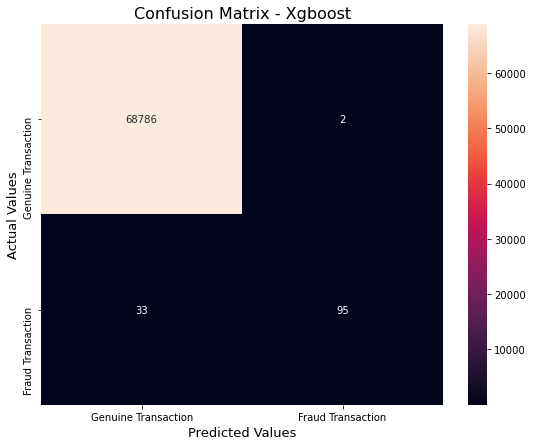

In [51]:
plt.figure(figsize=(9,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values', size = 13)
ax.set_ylabel('Actual Values', size = 13)
ax.set_title('Confusion Matrix - Xgboost',size = 16)
ax.xaxis.set_ticklabels(['Genuine Transaction','Fraud Transaction'])
ax.yaxis.set_ticklabels(['Genuine Transaction','Fraud Transaction'])
plt.show()

#### Classification Report of the Model 

In [52]:
matrix = classification_report(y_test,xgb_pred)
print(matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.98      0.74      0.84       128

    accuracy                           1.00     68916
   macro avg       0.99      0.87      0.92     68916
weighted avg       1.00      1.00      1.00     68916

